# Proposal's benchmark

We train the proposed algorithm on some classical benchmark datasets, such as:

* Iris: 150 samples (50 for each *Iris* variety), 4 features
* Chainlink: 1000 samples, 3-dimensional dataset of two chained rings
* Spiral: 700 samples of two clusters in spiral shape 
* Gaussian: 300 samples, a Gaussian-distributed dataset of 3 clusters, 100 for each
* MNIST: Relatively large dataset (60000 samples in the training data) of
handwritten decimal digits 28x28 images.

The choice of hyperparameters such as map dimension was decided by experimentation on each dataset.

In [1]:
# data-handling
import pandas as pd
import numpy as np
# plotagem
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# clustering
from clustering import cluster
from minisom import MiniSom
# artificial data
import sys
sys.path.append("..")
from som.artificial_data import normalized_data, labels, normalize
from assessing import hungarian_method

In [2]:
def train_and_plot(
    data,
    true_labels,
    x,
    y,
    k,
    topology = 'rectangular',
    num_iteration = None,
    random_seed = None,
    prune_activity = False,
):
    som = MiniSom(x, y, data.shape[1], random_seed=random_seed, topology=topology)
    if num_iteration is None:
        num_iteration=10*data.shape[0]
    som.train(data, num_iteration=num_iteration)
    neuron_clusters = cluster(som, data, k=k, prune_activity=prune_activity)
    labels = np.array(
        [neuron_clusters[som.winner(x)] for x in data]
    ) 
    
    if data.shape[1] == 3:
        fig = plt.figure()
        ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax_2 = fig.add_subplot(1, 2, 2, projection='3d')

        ax_1.scatter(
            data[:, 0],
            data[:, 1],
            data[:, 2],
            c=true_labels
        )
        ax_1.set_title("True labels")

        ax_2.scatter(
            data[:, 0],
            data[:, 1],
            data[:, 2],
            c=labels
        )
        ax_2.set_title(f"Proposal's labels\n{x} x {y}")
    else:
        fig, axs = plt.subplots(1, 2, sharey=True)
        axs[0].scatter(data[:, 0], data[:, 1], c=true_labels)
        axs[0].set_title("True labels")
        axs[1].scatter(data[:, 0], data[:, 1], c=labels)
        axs[1].set_title(f"Proposal's labels\n{x} x {y}")
        fig.set_size_inches(12, 5)
    plt.show()


## Spiral data

In [6]:
spiral_data = normalized_data['spiral']
spiral_labels = labels['spiral']

[[0.         0.52462378 0.         0.         0.         0.
  0.         0.53048252 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.52462378 0.         0.97478746 0.         0.         0.
  0.         0.         0.69881369 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.97478746 0.         0.49579252 0.         0.
  0.         0.         0.         0.50769116 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.49579252 0.         0.51480534 0.
  0.         0.         0.         0.         0.76143386 0.
  0.         0.    

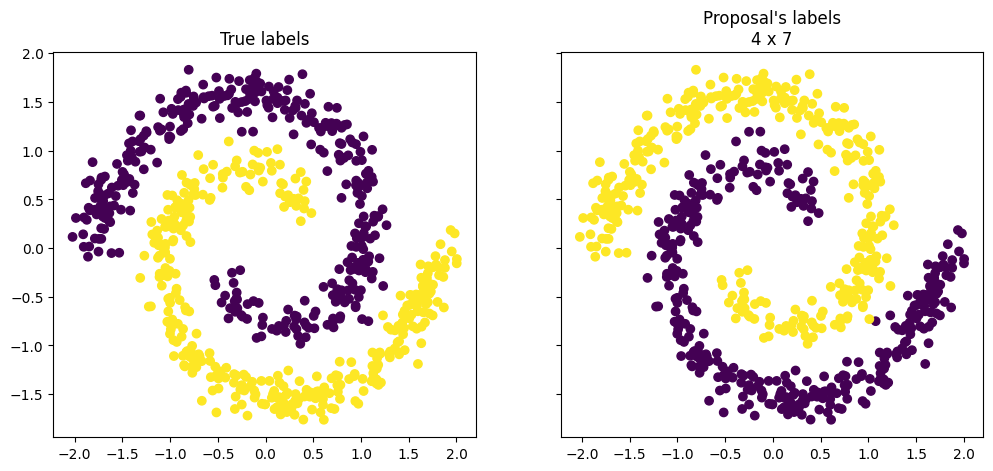

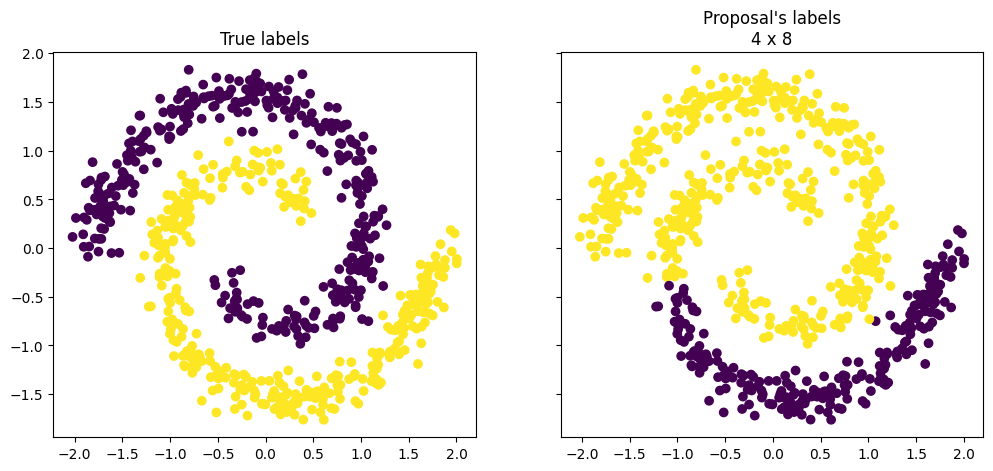

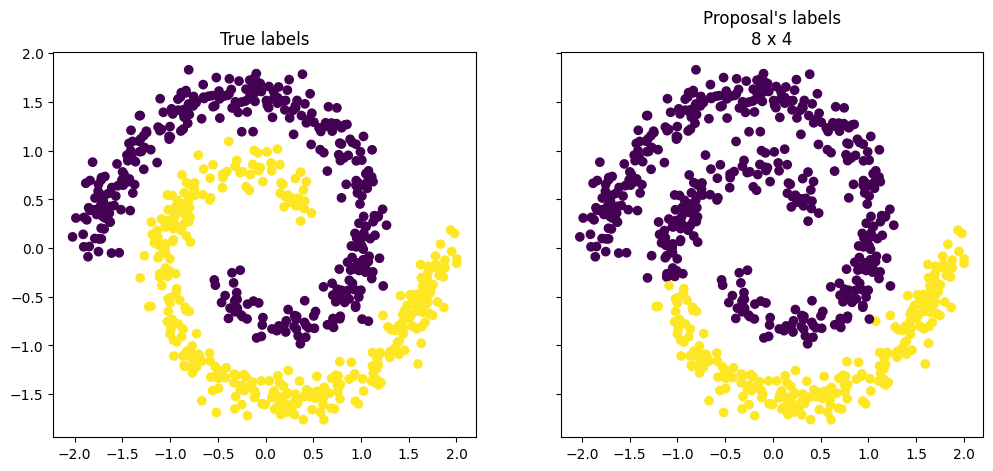

In [8]:
good_shapes = [
    (4, 7), (4, 8), (8, 4)
]

for (x, y) in good_shapes:
    train_and_plot(
        data=spiral_data,
        true_labels=spiral_labels,
        random_seed=42, # important for reproducibility
        x=x, y=y, k=2, prune_activity=False
    )

After playing with the dataset, some map shapes performed well

However, if we increased the dataset size by, say, 100, the same shapes wouldn't have 
a similar performance at all.

Also note that similar map size doesn't necessarily lead to similar results. While $8 \times 4$ and 
$4 \times 8$ did, if we plotted a $7 \times 4$, we would see a far worse performance than the $4 \times 7$

Another important feature to explore is if performances carries over map topology changes. In the below code, we plot the best-performing shapes we obtained exploring the spiral dataset with rectangular maps, but with hexagonal maps. In fact, they are not as efficient in detecting correct clusters **with that map dimensions**. Further dataset exploration yields the different shapes for an effective clustering with hexagonal maps.

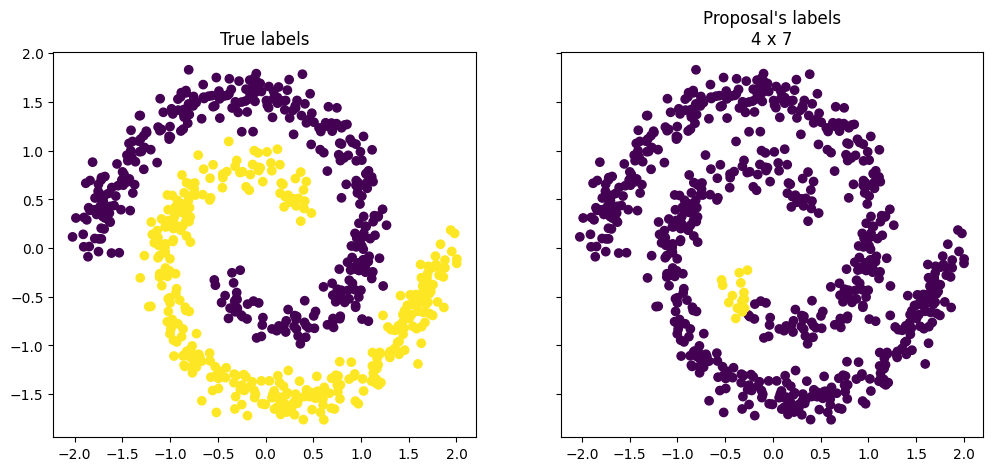

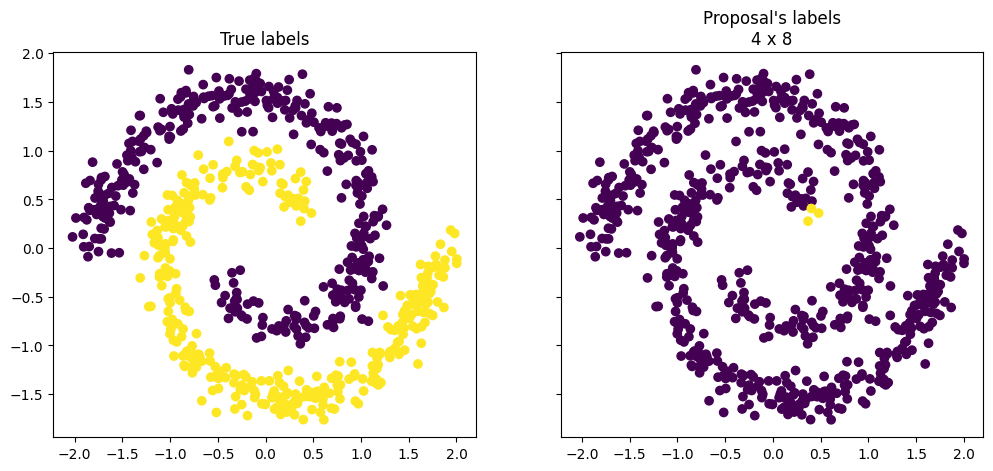

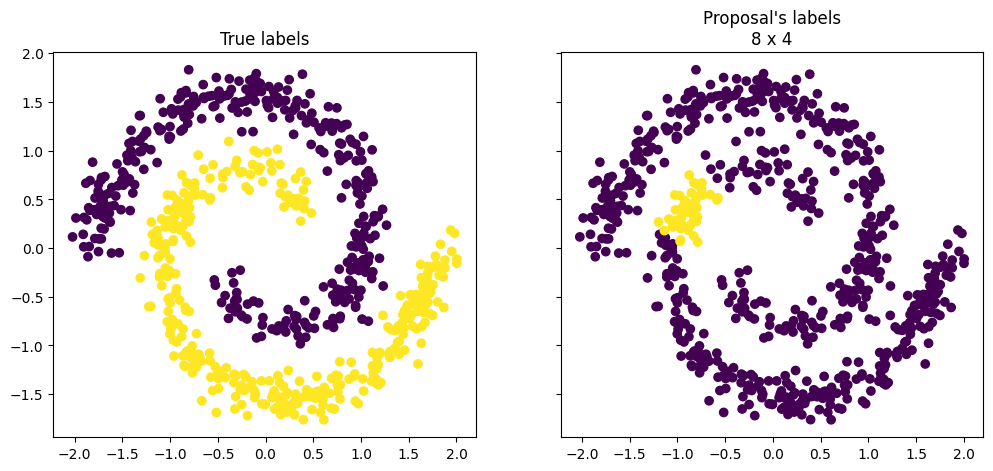

In [ ]:
for (x, y) in good_shapes:
    train_and_plot(
        data=spiral_data,
        true_labels=spiral_labels,
        random_seed=42, # important for reproducibility
        x=x, y=y, k=2, prune_activity=False,
        topology='hexagonal'
    )

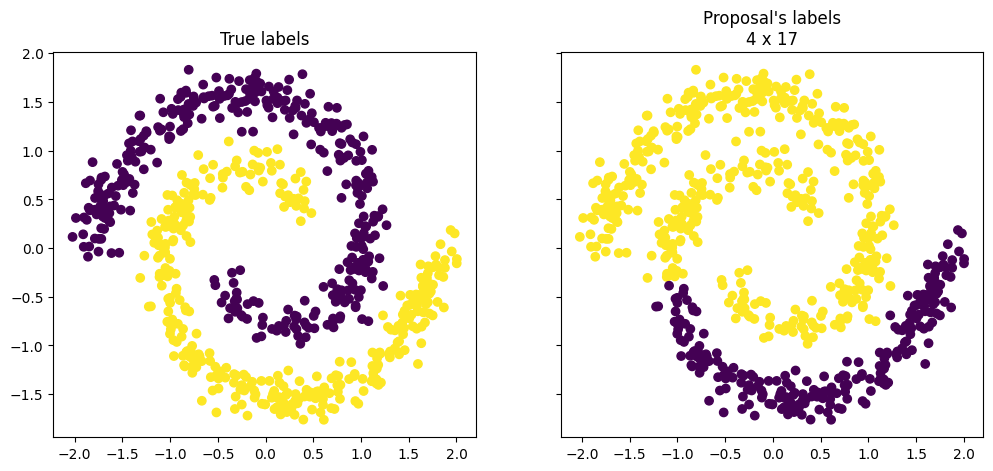

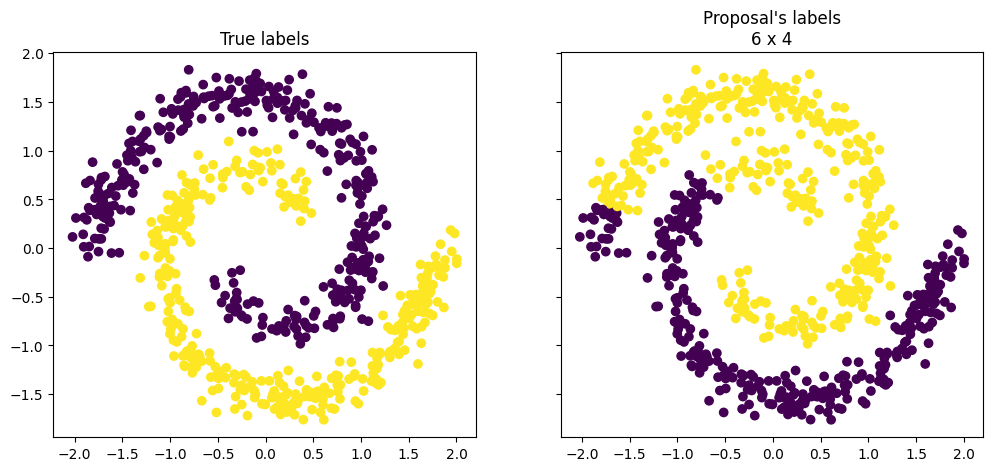

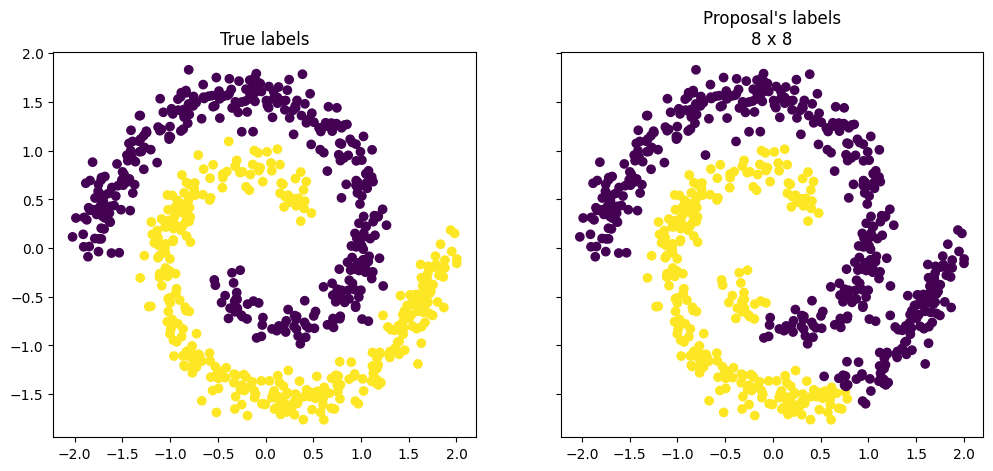

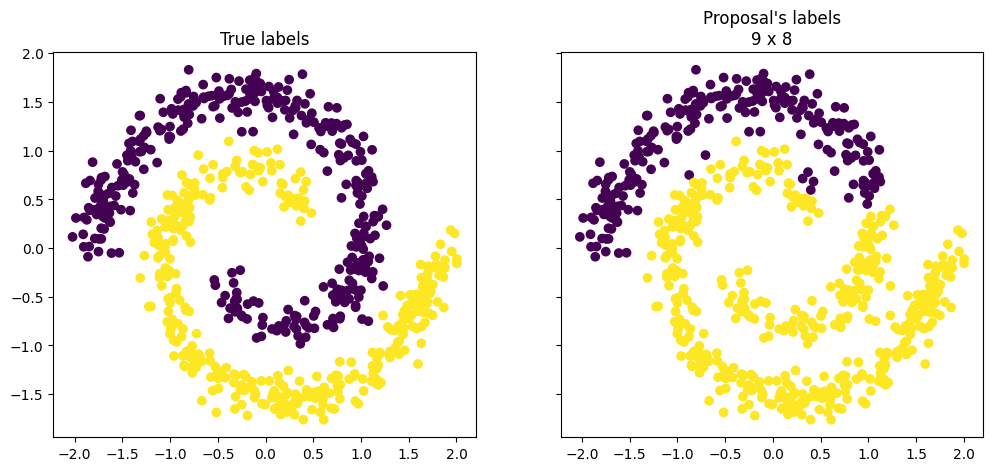

In [7]:
good_hex_shapes = [
    (4, 17), (6, 4), (8, 8), (9, 8)
]

for x, y in good_hex_shapes:
    train_and_plot(
        data=spiral_data,
        true_labels=spiral_labels,
        random_seed=42, # important for reproducibility
        x=x, y=y, k=2, prune_activity=False,
        topology='hexagonal'
    )

From now on, we will only use hexagonal topology.

# Chainlink

In [8]:
# obs: if reading the csv doesn't work, try changing the 'sep' argument to ;
chainlink_df = pd.read_csv('../data/chainlink.csv')
chainlink_df['ring'] = pd.factorize(chainlink_df['ring'])[0]
chainlink_data = normalize(chainlink_df.iloc[:, :-1].values)
chainlink_labels = chainlink_df['ring']
chainlink_df

,x,y,z,ring
0,0.6882,-0.7241,0.0014,0
1,-0.8932,-0.4196,-0.0108,0
2,-0.0483,1.0889,0.0242,0
3,0.7689,0.6918,0.0608,0
4,-0.0590,0.9295,-0.0718,0
...,...,...,...,...
995,-0.0682,0.2393,-0.7109,1
996,0.0039,1.7174,-0.7522,1
997,-0.0342,1.9084,-0.1863,1
998,0.0072,1.7825,0.6332,1


/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


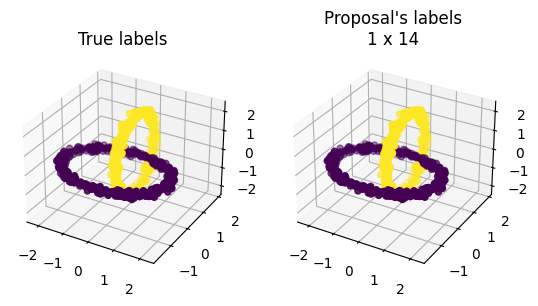

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


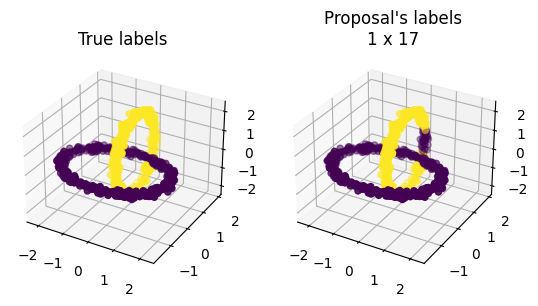

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


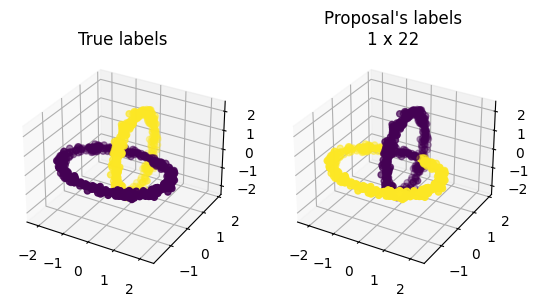

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


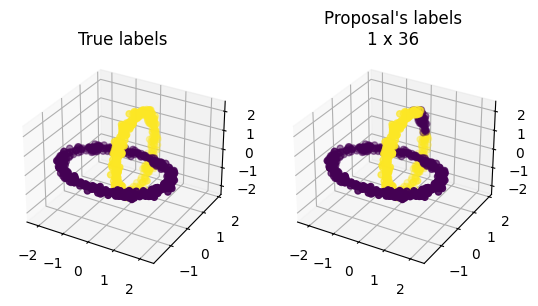

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


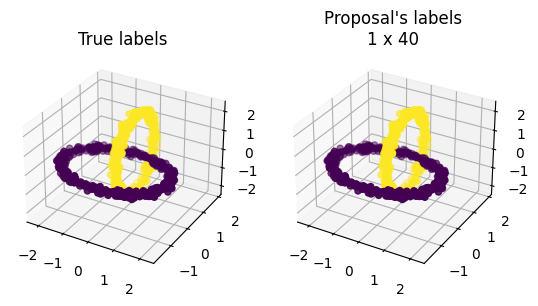

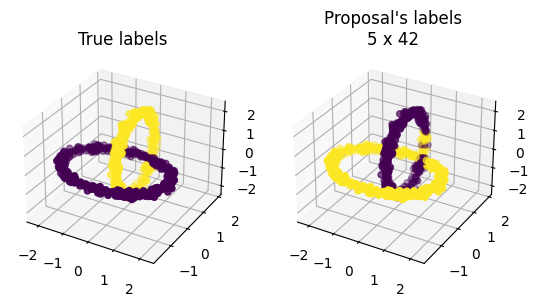

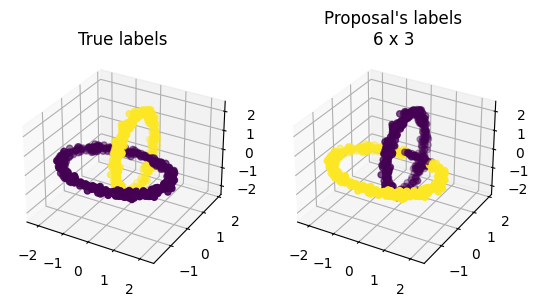

In [9]:
good_shapes = [
    (1, 14), (1, 17), (1, 22),
    (1, 36), (1, 40), (5, 42),
    (6, 3)
]

for x, y in good_shapes:
    train_and_plot(
        data=chainlink_data,
        true_labels=chainlink_labels,
        x=x, y=y, k=2,
        random_seed=42, # important for reproducibility
        topology='hexagonal'
    )

# Gaussian data

In [10]:
gaussian_data = normalized_data['gaussian']
gaussian_labels = labels['gaussian']

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


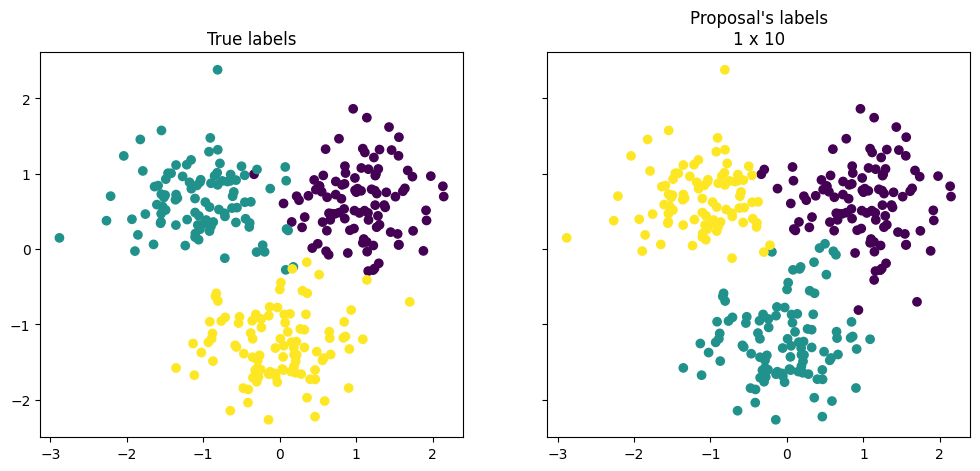

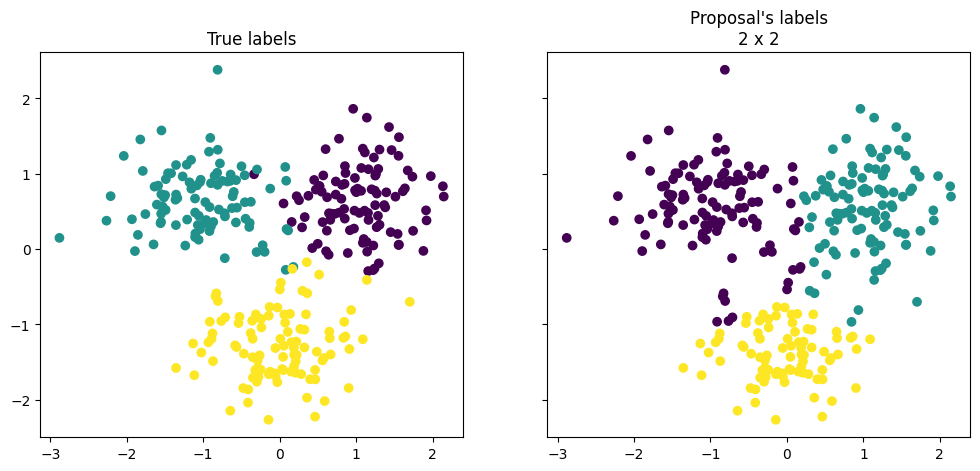

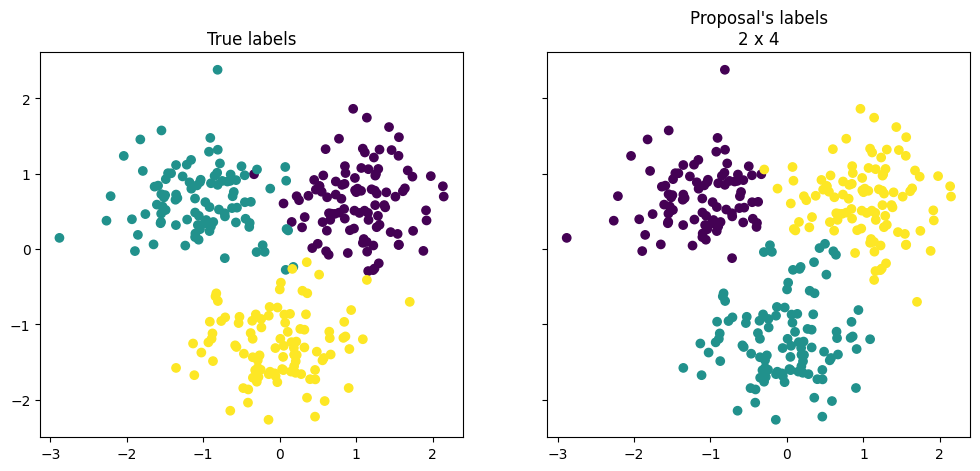

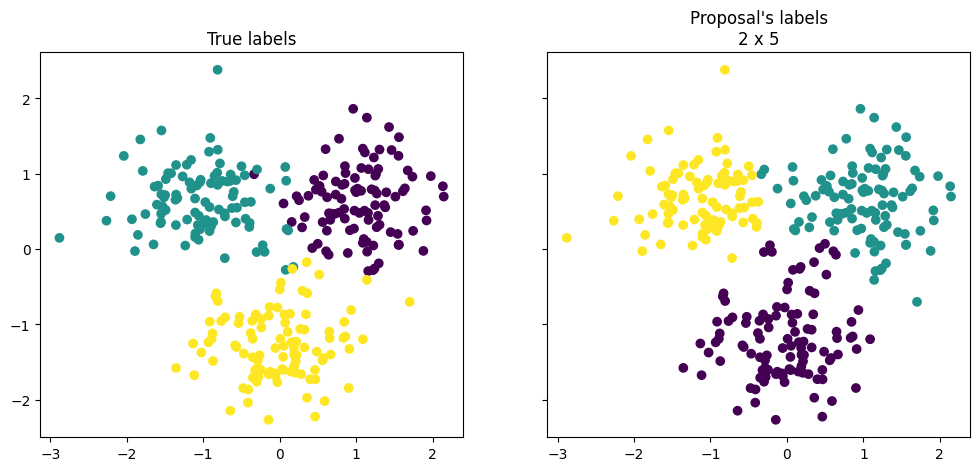

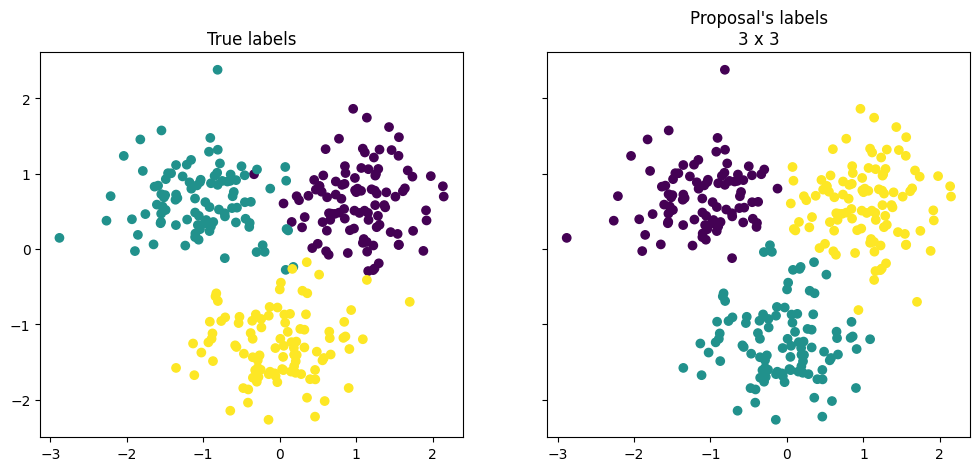

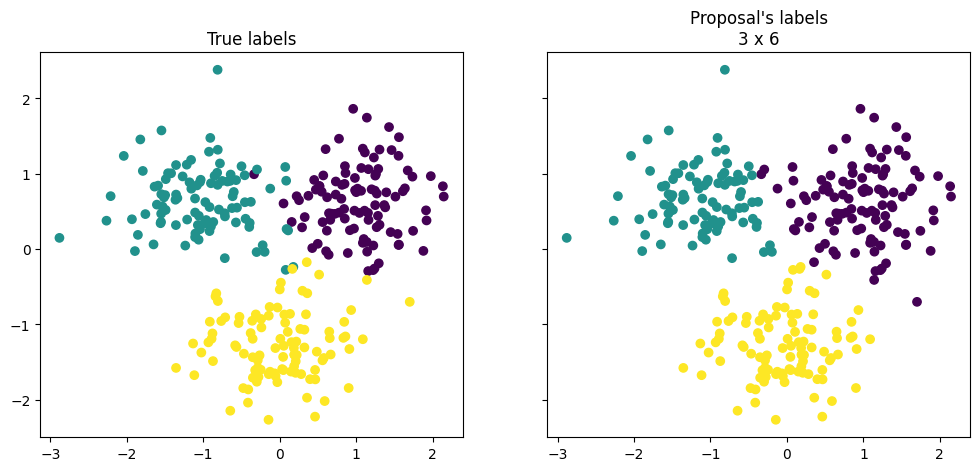

In [18]:
good_shapes = [
    (1, 10), (2, 2), (2, 4),
    (2, 5), (3, 3), (3, 6),
]
    
for x, y in good_shapes:
    train_and_plot(
        data=gaussian_data,
        true_labels=gaussian_labels,
        random_seed=42, # important for reproducibility
        x=x, y=y, k=3, prune_activity=False,
        topology='hexagonal'
    )

# Iris data

In [5]:
iris_data = normalized_data['iris']
iris_labels = labels['iris']

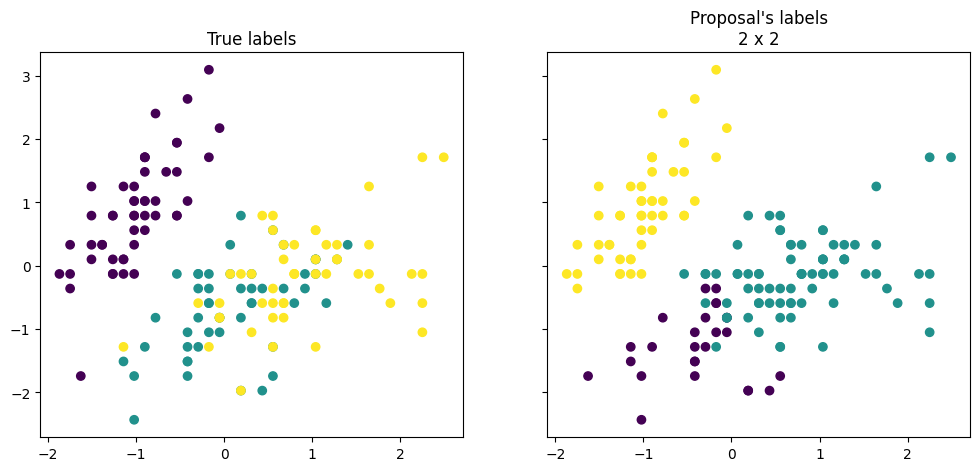

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


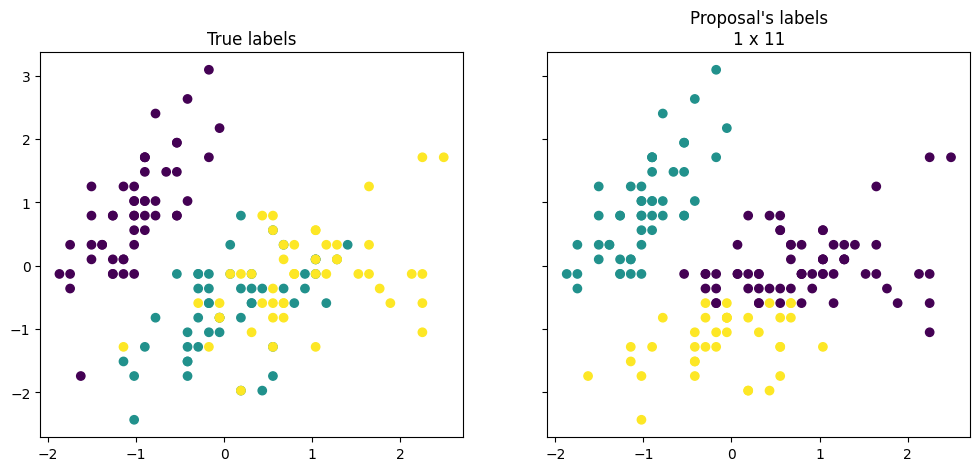

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


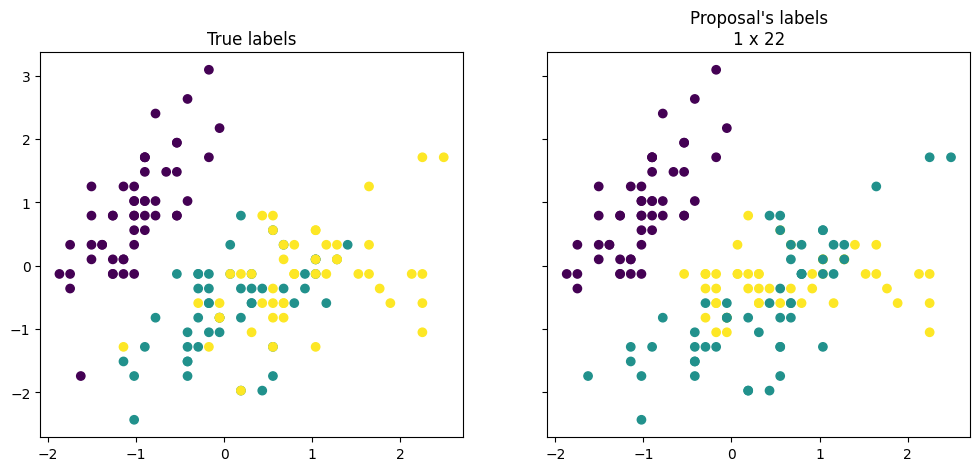

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


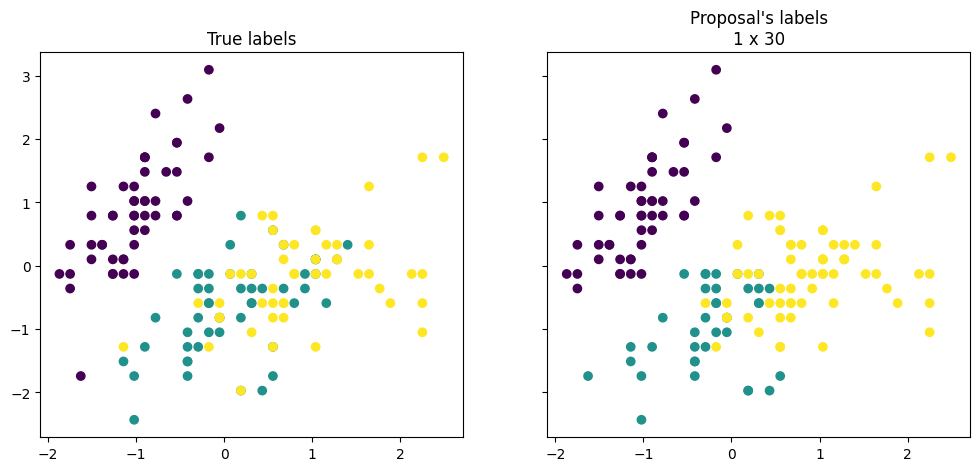

In [10]:
good_shapes = [
    (2, 2), (1, 11), (1, 22),
    (1, 30)
]

for x, y in good_shapes:
    train_and_plot(
        data=iris_data,
        true_labels=iris_labels,
        random_seed=42, # important for reproducibility
        x=x, y=y, k=3, prune_activity=False,
        topology='hexagonal'
    )

# MNIST

Since this dataset is hard to plot meaningfully, we use the hungarian method for finding the 
clustering accuracy between the proposal's clusters and the true labels.

We transform the dataset from 60000 28x28 images to 60000, $28^2$-dimension vectors.
The proposed algorithm performed poorly, with average performance of maps in the trained
range of $[1 - 15]$ for x and $[1 - 60]$ for y being 30%. The best performance values were
those of 50%.

In [3]:
def load_compressed(filepath):
    npz = np.load(filepath)
    arr = npz.f.arr_0
    npz.close()
    return arr

path = '../data/mnist/'
X_train = load_compressed(path + 'X_train_compressed.npz')
y_train = load_compressed(path + 'y_train_compressed.npz')
X_test = load_compressed(path + 'X_test_compressed.npz')
y_test = load_compressed(path + 'y_test_compressed.npz')

In [4]:
def train_and_print(
    x,
    y,
    X_train,
    y_train,
    X_test,
    y_test,
    sigma=1,
    random_seed=42
):
    som = MiniSom(x, y, input_len=X_train.shape[1], sigma=sigma, random_seed=random_seed)
    som.train(X_train, num_iteration=X_train.shape[0]*10)

    k = len(np.unique(y_train))
    # we do -1 to match the original X_train labels
    neuron_clusters = cluster(
        som,
        X_train,
        k=k,
        prune_activity=False,
    ) - 1
    train_labels = np.array([
        neuron_clusters[som.winner(x)] for x in X_train
    ], dtype='uint8')

    uc1 = np.unique(y_train)
    uc2 = np.unique(train_labels)
    if uc1.size == uc2.size:
        print(f'x, y={x, y}, sigma={sigma}')
        train_acc = hungarian_method(y_train, train_labels)
        print(f'\tTrain data acc={train_acc}')
        test_labels = np.array([
            neuron_clusters[som.winner(x)] for x in X_test
        ])
        uc3 = np.unique(test_labels)
        if uc1.size == uc3.size:
            test_acc = hungarian_method(y_test, test_labels)
            print(f'\tTest data acc={test_acc}')
        else:
            print('\tFailed to identify all classes')

In [5]:
# each row becomes a normalized image
n, m, p = X_train.shape
X_train = X_train.reshape(n, m*p) / np.max(X_train)
n, m, p = X_test.shape
X_test = X_test.reshape(n, m*p) / np.max(X_test)

In [5]:
best_vals = [
    (6, 3), (3, 6), (2, 7), (7, 2), (10, 2)
]
print('accuracies for each map. Closer to 1 is better')
for x, y in best_vals:
    train_and_print(
        x, y,
        X_train,
        y_train,
        X_test,
        y_test
    )

accuracies for each map. Closer to 1 is better
x, y=(6, 3), sigma=1
	Train data acc=0.4951
	Test data acc=0.5008
x, y=(3, 6), sigma=1
	Train data acc=0.4951
	Test data acc=0.5008
x, y=(2, 7), sigma=1
	Train data acc=0.4883166666666667
	Test data acc=0.4833
x, y=(7, 2), sigma=1
	Train data acc=0.5186166666666666
	Test data acc=0.5049
x, y=(10, 2), sigma=1
	Train data acc=0.47705
	Test data acc=0.4674
x, y=(15, 10), sigma=1
	Train data acc=0.19881666666666667
	Test data acc=0.1819
x, y=(18, 9), sigma=1
	Train data acc=0.22755
	Test data acc=0.2259
x, y=(20, 15), sigma=1
	Train data acc=0.24858333333333332
	Test data acc=0.2377


In [ ]:
print("Hungarian method for larger maps")
for x in range(10, 51, 5):
    for y in range(10, 51, 5):
        train_and_print(
            x, y,
            X_train,
            y_train,
            X_test,
            y_test
        )

Hungarian method for larger maps
x, y=(10, 10), sigma=1
	Train data acc=0.2517666666666667
	Test data acc=0.2505
x, y=(10, 15), sigma=1
	Train data acc=0.21025
	Test data acc=0.2159
x, y=(10, 20), sigma=1
	Train data acc=0.24411666666666668
	Test data acc=0.2411
x, y=(10, 25), sigma=1
	Train data acc=0.23691666666666666
	Test data acc=0.234
x, y=(10, 30), sigma=1
	Train data acc=0.2553
	Test data acc=0.2551
x, y=(10, 35), sigma=1
	Train data acc=0.23408333333333334
	Test data acc=0.2353
x, y=(10, 40), sigma=1
	Train data acc=0.20635
	Test data acc=0.2053
x, y=(10, 45), sigma=1
	Train data acc=0.22638333333333333
	Test data acc=0.226
x, y=(10, 50), sigma=1
	Train data acc=0.15138333333333334
	Test data acc=0.1513
x, y=(15, 10), sigma=1
	Train data acc=0.19881666666666667
	Test data acc=0.1819
x, y=(15, 15), sigma=1
	Train data acc=0.18116666666666667
	Test data acc=0.1832
x, y=(15, 20), sigma=1
	Train data acc=0.29225
	Test data acc=0.298
x, y=(15, 25), sigma=1
	Train data acc=0.2666
	T